# Business Objective 

Building a model that detect's fraud

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn
from collections import Counter

# Exploratory Data Analysis 

In [2]:
df = pd.read_csv("fraud_data.csv")

pd.set_option('display.max_columns', None)

df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,credit,269.0,87.0,NaN,NaN,yahoo.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.791666,0.791666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,15.0,136.0,0.0,0.0,0.0,0.0,1822.0,47.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,15951.99023,198853.7656,0.0,0.0,0.0,915.0,5975.0,1320.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82050.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,NaN,529.0,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10.12,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,19

Categorical Features – Transaction

ProductCD – Product code card1 - card6 : payment card information, such as card type, card category, issue bank, country, etc. addr1, addr2 P_emaildomain – Purchaser R_emaildomain- Recipient M1 - M9 – Match between names on card and address etc.

Categorical Features - Identity DeviceType DeviceInfo id_12 - id_38 customer identity variables The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp buth rather a duration).

Outcome/Target Variable – isFraud

whether transaction is fraud or not

In [3]:
# check the number rows and columns of the dataset
df.shape

(59054, 434)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59054 entries, 0 to 59053
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(18), object(31)
memory usage: 195.5+ MB


In [5]:
missing_percentage = df.isnull().mean() * 100
missing_percentage

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
id_36             75.945745
id_37             75.945745
id_38             75.945745
DeviceType        75.979612
DeviceInfo        79.813391
Length: 434, dtype: float64

In [6]:
# Eliminate automatically variables with more than 20% of missingness

df = df[df.columns[missing_percentage < 20]]

In [7]:
df.shape

(59054, 182)

In [8]:
# filling missing values of numeric columns

df_single= df
cols= df_single.columns
num_cols = df_single.select_dtypes(include=np.number).columns
df_single.loc[:,num_cols]=df_single.loc[:,num_cols].fillna(df_single.loc[:,num_cols].mean())
print(num_cols)
print(df_single.loc[:,num_cols].mean())

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=178)
TransactionID     3.282166e+06
isFraud           3.395198e-02
TransactionDT     7.368220e+06
TransactionAmt    1.341429e+02
card1             9.910366e+03
                      ...     
V317              2.621775e+02
V318              1.759274e+02
V319              1.740723e+01
V320              4.214813e+01
V321              2.803849e+01
Length: 178, dtype: float64


In [9]:
# filling missing values of categorical columns

cat_cols= list(set(cols) - set(num_cols))
df_single.loc[:,cat_cols] = df_single.loc[:,cat_cols].fillna(df.loc[:,cat_cols].mode().iloc[0])
train_cols = df_single.columns
print(cat_cols)
print(df_single.loc[:,cat_cols].mode().iloc[0])

['P_emaildomain', 'ProductCD', 'card6', 'card4']
P_emaildomain    gmail.com
ProductCD                W
card6                debit
card4                 visa
Name: 0, dtype: object


In [10]:
# check if the columns with missing values again

df_single.columns[df_single.isnull().mean() > 0] # select those variables with missing values

Index([], dtype='object')

In [11]:
# checking duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [12]:
# describe object features
df.describe(include='object')

,ProductCD,card4,card6,P_emaildomain
count,59054,59054,59054,59054
unique,5,4,4,59
top,W,visa,debit,gmail.com
freq,43840,38505,44286,32327


In [13]:
# describe numeric features
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,5.905400e+04,59054.000000,5.905400e+04,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.0,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000
mean,3.282166e+06,0.033952,7.368220e+06,134.142888,9910.366360,362.438054,153.264551,199.104231,290.653939,86.806616,13.213212,14.233447,0.005571,3.673773,5.480120,8.574305,2.476784,4.551275,4.422173,4.642226,9.597893,3.551428,31.658753,7.955397,94.243548,124.267325,163.966616,0.559650,0.597624,0.999398,0.124619,0.125551,0.137374,0.138830,0.814731,0.845542,0.133239,0.135394,1.035702,1.058825,0.977247,0.987245,0.000621,0.000679,0.383778,0.402532,0.143839,0.145334,0.133375,0.141354,0.577891,0.619606,1.069064,1.121270,0.130224,0.134370,0.135635,0.144103,0.830144,0.866973,0.132482,0.143577,0.999533,0.981138,0.998521,0.000467,0.387344,0.405077,0.142760,0.147354,0.142585,0.154809,0.544799,0.587851,1.086124,1.142315,0.138761,0.145570,0.154416,0.842309,0.880149,0.139120,0.151600,1.064179,1.098444,0.999081,0.000779,0.397033,0.416123,0.151521,0.155714,

In [14]:
# visualizing the distribution of my categorical data

df['ProductCD'].value_counts()

ProductCD
W    43840
C     7003
R     3758
H     3284
S     1169
Name: count, dtype: int64

In [15]:
df['card4'].value_counts()

card4
visa                38505
mastercard          19042
american express      831
discover              676
Name: count, dtype: int64

In [16]:
df['card6'].value_counts()

card6
debit              44286
credit             14764
debit or credit        3
charge card            1
Name: count, dtype: int64

In [18]:
# xTrain['P_emaildomain'].value_counts()

In [19]:
# visualizing the distribution of my numerical data

# sns.pairplot(xTrain)

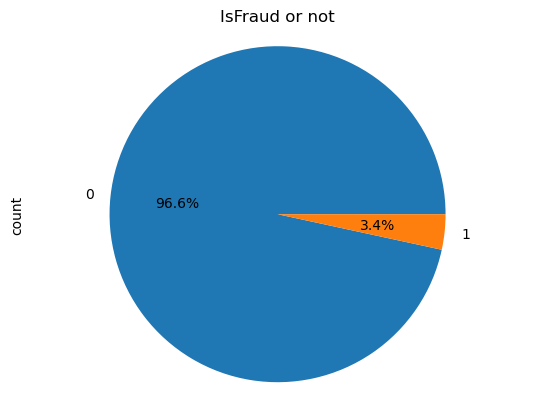

In [17]:
# Calculate the frequency of each category
category_counts = df['isFraud'].value_counts()

# Create the pie chart
category_counts.plot(kind='pie', labels=category_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('IsFraud or not')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

In [18]:
from sklearn.utils import resample

# Assuming you have the entire dataset in a DataFrame called 'data'
# Separate the majority and minority classes
majority_class = df[df['isFraud'] == 0]  # Assuming the majority class is labeled as 0
minority_class = df[df['isFraud'] == 1]  # Assuming the minority class is labeled as 1

# Upsample the minority class to match the majority class
minority_upsampled = resample(minority_class, 
                              replace=True,     # Sample with replacement
                              n_samples=len(majority_class) if len(minority_class) > 0 else 1,   # Match the number of samples in the majority class, or set to 1 if the minority class is empty
                              random_state=42)  # Set a random seed for reproducibility

# Combine the upsampled minority class with the majority class
resampled_data = pd.concat([majority_class, minority_upsampled])

# Separate the features (X) and labels (y) from the resampled data
X_resampled = resampled_data.drop('isFraud', axis=1)
y_resampled = resampled_data['isFraud']

# Print the resampled data
print(X_resampled.head())
print(y_resampled.head())

   TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        2994681         242834          25.000         H   9803  583.0   
1        3557242       15123000         117.000         W   7919  194.0   
2        3327470        8378575          73.773         C  12778  500.0   
3        3118781        2607840         400.000         R  12316  548.0   
4        3459772       12226544          31.950         W   9002  453.0   

   card3       card4  card5   card6  addr1  addr2  P_emaildomain  C1  C2  C3  \
0  150.0        visa  226.0  credit  269.0   87.0      yahoo.com   1   1   0   
1  150.0  mastercard  166.0   debit  181.0   87.0      gmail.com   1   4   0   
2  185.0  mastercard  224.0  credit  284.0   60.0    hotmail.com   1   3   0   
3  150.0        visa  195.0  credit  441.0   87.0  anonymous.com   1   1   0   
4  150.0        visa  226.0   debit  264.0   87.0      yahoo.com   3   3   0   

   C4  C5  C6  C7  C8  C9  C10  C11  C12  C13  C14    D1         D10

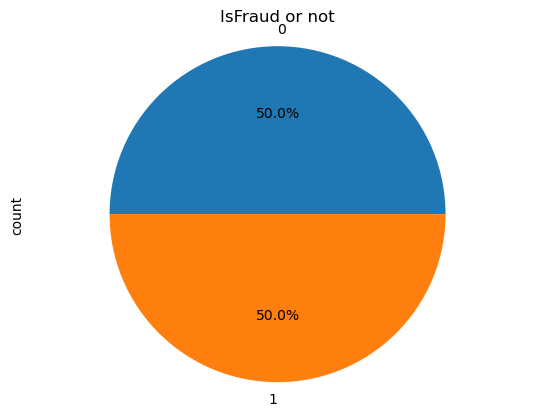

In [19]:
# Calculate the frequency of each category
category_counts = resampled_data['isFraud'].value_counts()

# Create the pie chart
category_counts.plot(kind='pie', labels=category_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('IsFraud or not')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler

# Standardize the numeric features
scaler = StandardScaler()
resampled_data[num_cols] = scaler.fit_transform(resampled_data[num_cols])

# Print the standardized DataFrame
print(resampled_data)

       TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0          -1.749151     -1.0      -1.596283       -0.489344         H   
1           1.643619     -1.0       1.711558       -0.099290         W   
2           0.257878     -1.0       0.212282       -0.282560         C   
3          -1.000712     -1.0      -1.070545        1.100552         R   
4           1.055783     -1.0       1.067680       -0.459878         W   
...              ...      ...            ...             ...       ...   
58429       0.351858      1.0       0.308265       -0.455469         C   
23333      -0.443502      1.0      -0.477110       -0.171365         R   
53755       0.942655      1.0       0.931292       -0.442851         C   
11601      -1.120408      1.0      -1.166458       -0.349645         W   
28176       0.736831      1.0       0.711444       -0.560499         C   

          card1     card2     card3       card4     card5   card6     addr1  \
0      0.019336  1.408134 -0.506

In [ ]:
# Manage outliers 

# One Hot Encoding 

In [21]:
X_resampled.info()
xTrain_dummy = pd.get_dummies(X_resampled, prefix_sep='_', drop_first=True)

<class 'pandas.core.frame.DataFrame'>
Index: 114098 entries, 0 to 28176
Columns: 181 entries, TransactionID to V321
dtypes: float64(160), int64(17), object(4)
memory usage: 158.4+ MB


In [22]:
final_tr = pd.DataFrame(data=xTrain_dummy)

print(final_tr.shape)

(114098, 245)


# Train Test Split

In [23]:
# set x and y variables
y = y_resampled
x= final_tr


from sklearn.model_selection import train_test_split

# Split randomly into 80% train data and 20% test data
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 123)

# Train Validation split 

In [24]:
from sklearn.model_selection import train_test_split

# Split randomly into 80% train data and 20% test data
xtrain, xval, ytrain, yval = train_test_split(final_tr, y_resampled, test_size = 0.2, random_state = 123)

# SVM 

In [27]:
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline


In [ ]:
# Fit the SVM model
model = svm.SVC(kernel='rbf')
model.fit(final_tr, y_resampled)

Visualization

In [ ]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

In [ ]:
# Plot the hyperplane
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(xTrain, yTrain)

# Select a specific instance from the test dataset
index = 6  # Choose a valid index within the range of the test dataset

# Predict output
predicted = model.predict([xTest.iloc[index]])

# Print the actual and predicted values
print("Actual Value:", yTest.iloc[index])
print("Predicted Value:", predicted[0])

Actual Value: 1
Predicted Value: 1


C:\Users\Famille NTSAMA\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Model Evaluation

In [26]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

nb_predictions = model.predict(xTest)
accuray = accuracy_score(nb_predictions, yTest)
f1 = f1_score(nb_predictions, yTest, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)



Accuracy: 0.4868536371603856
F1 Score: 0.6320678829461747


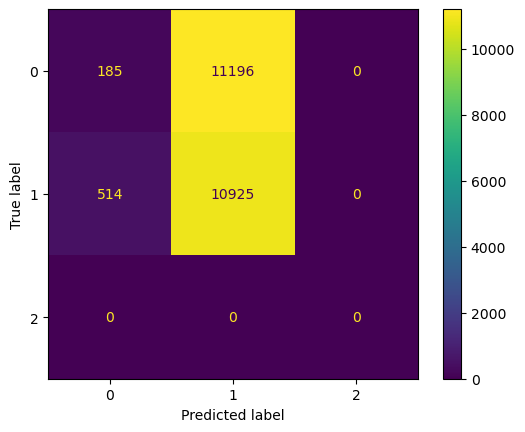

In [27]:
labels = [0,1,2]
cm = confusion_matrix(yTest, nb_predictions, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# Random Forest

In [28]:
# libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [29]:
#modeling

rf = RandomForestClassifier()
rf.fit(xTrain, yTrain)
rf_predictions = rf.predict(xTest)

Model Evaluation

In [30]:
accuracy = accuracy_score(yTest, rf_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9980718667835232


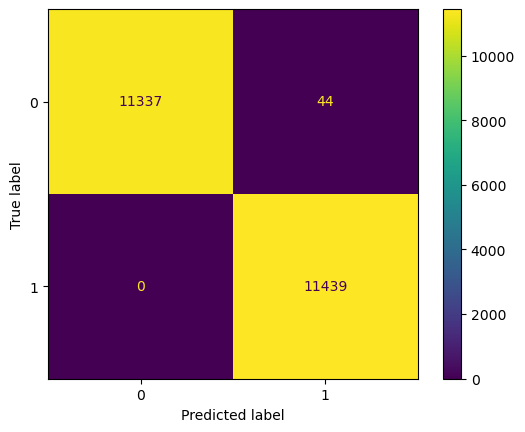

In [31]:
# Generate predictions with the best model
y_pred = rf.predict(xTest)

# Create the confusion matrix
cm = confusion_matrix(yTest, rf_predictions)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Hyperparameter Tunning

In [32]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf1 = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(xTrain, yTrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000175B3910450>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000175B390C990>})

In [38]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 281}


# Ensemble methods

In [ ]:
# Combine predictions using model averaging
ensemble_predictions = (rf_predictions + nb_predictions) / 2

# Evaluate ensemble performance (e.g., accuracy)
ensemble_accuracy = accuracy_score(yTest, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)